In [1]:
#Lendo os dataframes
import pandas as pd
path = 'C:\\Users\\napcc\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'


mun = pd.read_csv(path+'ProcessoMunicipio.csv')
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
eventos = pd.read_csv(path+'ProcessoEvento.csv')
processos = pd.read_csv(path+'Processo.csv')
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')

## Preparando os DataFrames para 333 para as analises de área


In [3]:
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos333 = eventos.query('IDEvento == 333')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Merge entre processos ativos e processos de evento 333:
processos333_ativos = prceossos_ativos.merge(eventos333,how='inner',on='DSProcesso')
#Transformando o campo de data do evento333 em datetime
processos333_ativos['Data'] = pd.to_datetime(processos333_ativos.DTEvento).dt.year
#Filtrando os processos 333 ativos com a base de ouro:
processos333_ativos_ouro = processos333_ativos[processos333_ativos['DSProcesso'].isin(ouro.DSProcesso)]
#Retirando duplicados:
processos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_333 = mun[mun['DSProcesso'].isin(processos333_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]

#Dando Join com o df processos333_ativos_ouro para plotar o ano com regiao do brasil
join_333_regiao = processos333_ativos_ouro.merge(mun_ouro_ativo_333,on='DSProcesso',how='inner')
join_333_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Transformando a coluna de Area para número!
import numpy as np
join_333_regiao['QTAreaHA'] = join_333_regiao['QTAreaHA'].str.replace(',', '.').astype(float)
join_333_regiao

C:\Users\napcc\AppData\Local\Temp\ipykernel_25192\2493657228.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\napcc\AppData\Local\Temp\ipykernel_25192\2493657228.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]


,Unnamed: 0_x,DSProcesso,NRProcesso,NRAnoProcesso,BTAtivo,NRNUP,IDTipoRequerimento,IDFaseProcesso,IDUnidadeAdministrativaRegional,IDUnidadeProtocolizadora,...,Unnamed: 0_y,IDEvento,DTEvento,Evento_,Data,Unnamed: 0,IDMunicipio,Municipios,UF,Regiao
1,10544,815.187/2022,815187,2022,S,48066.815187/2022-24,2.0,5,11,48066.0,...,1526270,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214686,4206306,GUABIRUBA,SC,Sul
3,10587,815.188/2022,815188,2022,S,48066.815188/2022-79,2.0,5,11,48066.0,...,1526692,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214745,4206306,GUABIRUBA,SC,Sul
4,10630,815.189/2022,815189,2022,S,48066.815189/2022-13,2.0,5,11,48066.0,...,1527201,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,214795,4202909,BRUSQUE,SC,Sul
5,56386,820.434/2007,820434,2007,S,48402.820434/2007-15,2.0,5,2,48402.0,...,2058950,333,2007-07-05,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2007,271133,3523305,ITARIRI,SP,Sudeste
6,65703,820.657/2006,820657,2006,S,48402.820657/2006-93,2.0,5,2,48402.0,...,2172757,333,2006-09-27,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2006,282792,3523305,ITARIRI,SP,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,842873,806.127/2015,806127,2015,S,48422.806127/2015-95,24.0,6,22,48422.0,...,820903,333,2015-09-15,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2015,115989,2112407,TURIAÇU,MA,Nordeste
19040,843322,806.146/2021,806146,2021,S,48078.806146/2021-27,2.0,5,22,48078.0,...,826075,333,2021-11-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116533,2103158,CENTRO DO GUILHERME,MA,Nordeste
19041,843502,806.155/2021,806155,2021,S,48078.806155/2021-18,2.0,5,22,48078.0,...,827764,333,2021-12-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116744,2103158,CENTRO DO GUILHERME,MA,Nordeste
19042,843697,806.165/2021,806165,2021,S,48078.806165/2021-53,2.0,5,22,48078.0,...,829788,333,2021-12-13,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2021,116978,2103174,CENTRO NOVO DO MARANHÃO,MA,Nordeste


## Plotando agora os mesmos gráficos mas para área 

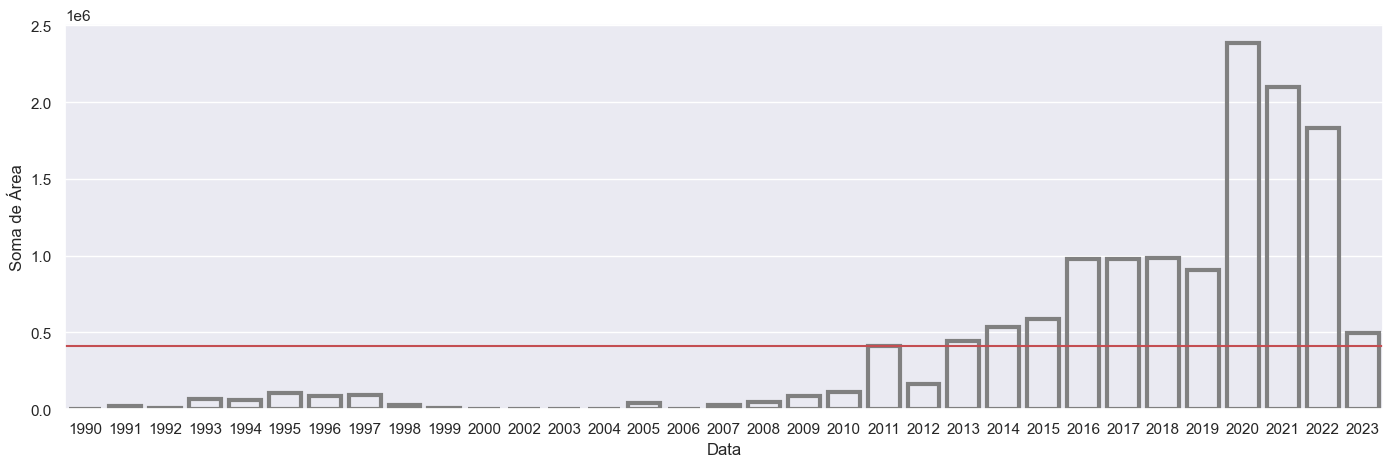

In [5]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})

#Agrupando os valores de area por ano e somando
area_pedida_333 = join_333_regiao.groupby('Data').sum()

y = sns.barplot(
    data=area_pedida_333, x=area_pedida_333.index, y="QTAreaHA", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)
y.set(xlabel='Data', ylabel='Soma de Área')
y.axhline(area_pedida_333['QTAreaHA'].mean(),color ='r')
plt.show()

## Plotando a área por ano mas quebrando para Regiao e um plot de Regiao quebrando por UF

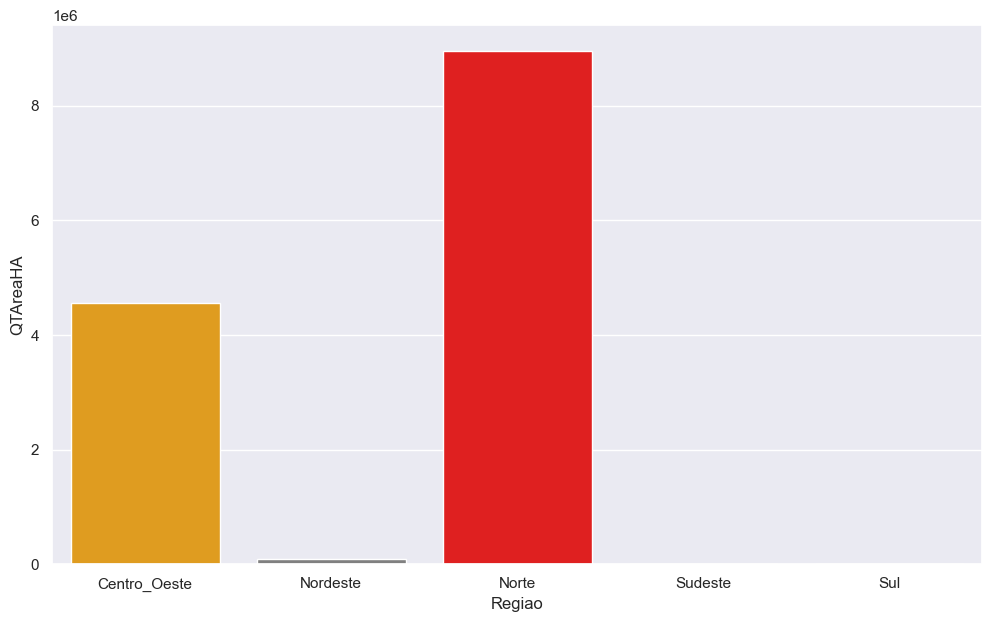

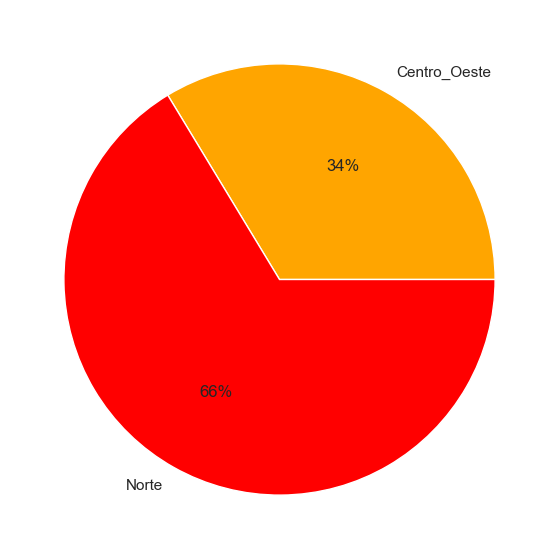

In [161]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(12, 7)})
#Fazendo BarPlot
data_regiao_333= join_333_regiao.groupby(['Regiao'], as_index=False).sum()
y = sns.barplot(data=data_regiao_333.query('Regiao=="Norte" | Regiao=="Centro_Oeste"'), x="Regiao", y="QTAreaHA",palette = ['orange','red'])
plt.show()
#Fazendo PiePlot
data_regiao_333.query('Regiao=="Norte" | Regiao=="Centro_Oeste"')
data = [0.33,0.65]
labels  = ['Centro_Oeste','Norte']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = ['orange','red'], autopct='%.0f%%')
plt.show()










## Preparando os dados para analisar area 513

In [4]:
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos513 = eventos.query('IDEvento == 513')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Merge entre processos ativos e processos de evento 333:
processos513_ativos = prceossos_ativos.merge(eventos513,how='inner',on='DSProcesso')
#Transformando o campo de data do evento513 em datetime
processos513_ativos['Data'] = pd.to_datetime(processos513_ativos.DTEvento).dt.year
#Filtrando os processos 513 ativos com a base de ouro:
processos513_ativos_ouro = processos513_ativos[processos513_ativos['DSProcesso'].isin(ouro.DSProcesso)]
#Retirando duplicados:
processos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_513 = mun[mun['DSProcesso'].isin(processos513_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]

#Dando Join com o df processos333_ativos_ouro para plotar o ano com regiao do brasil
join_513_regiao = processos513_ativos_ouro.merge(mun_ouro_ativo_513,on='DSProcesso',how='inner')
join_513_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)

#Transformando a coluna de Area para número!
import numpy as np
join_513_regiao['QTAreaHA'] = join_513_regiao['QTAreaHA'].str.replace(',', '.').astype(float)
full_join = join_513_regiao.merge(join_333_regiao,how='inner',on='DSProcesso')


C:\Users\napcc\AppData\Local\Temp\ipykernel_25192\807547001.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processos513_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\napcc\AppData\Local\Temp\ipykernel_25192\807547001.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mun_ouro_ativo_513['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_513['UF']]


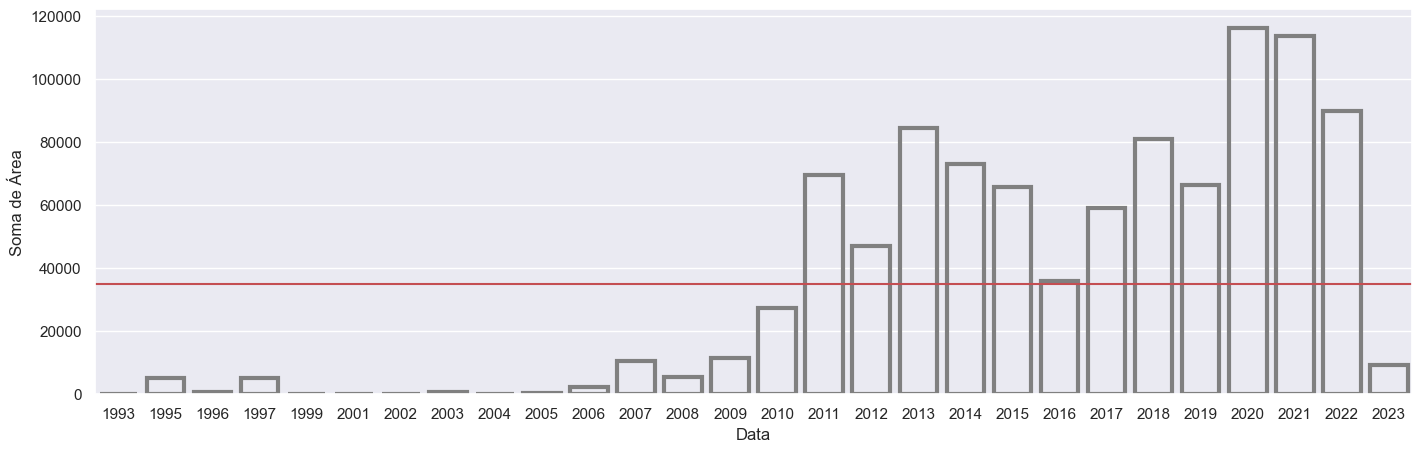

In [10]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 5)})

#Agrupando os valores de area por ano e somando
area_pedida_513 = full_join.groupby('Data_x').sum()

y = sns.barplot(
    data=area_pedida_513, x=area_pedida_513.index, y="QTAreaHA_x", capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)
)
y.axhline(area_pedida_513['QTAreaHA_x'].mean(),color ='r')
y.set(xlabel='Data', ylabel='Soma de Área')
plt.show()

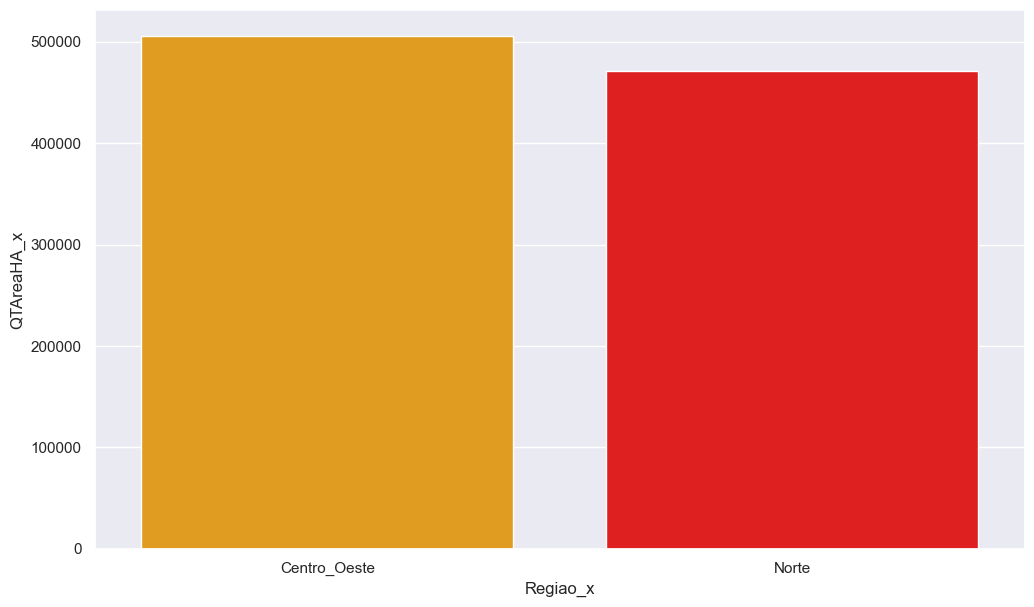

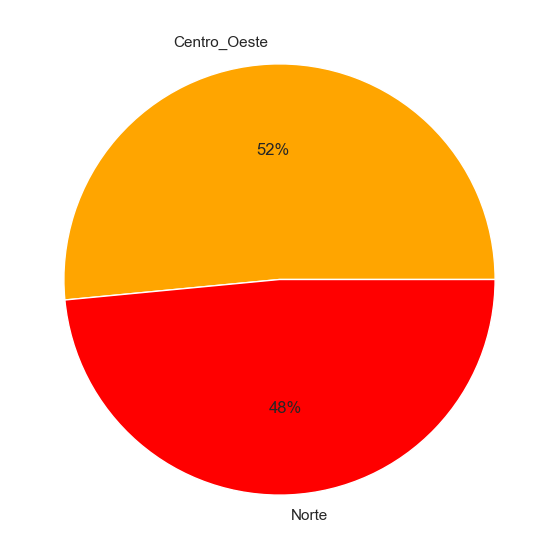

In [164]:
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(12, 7)})
#Fazendo BarPlot
data_regiao_513= full_join.groupby(['Regiao_x'], as_index=False).sum()
y = sns.barplot(data=data_regiao_513.query('Regiao_x=="Norte" | Regiao_x=="Centro_Oeste"'), x="Regiao_x", y="QTAreaHA_x",palette = ['orange','red'])
plt.show()

#Fazendo PiePlot
data_regiao_513.query('Regiao_x=="Norte" | Regiao_x=="Centro_Oeste"')

data = [0.51,0.48]
labels  = ['Centro_Oeste','Norte']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = ['orange','red'], autopct='%.0f%%')
plt.show()

## Unindo os dataframes com os dados de Pessoas:

<AxesSubplot: xlabel='5anos', ylabel='QTAreaHA'>

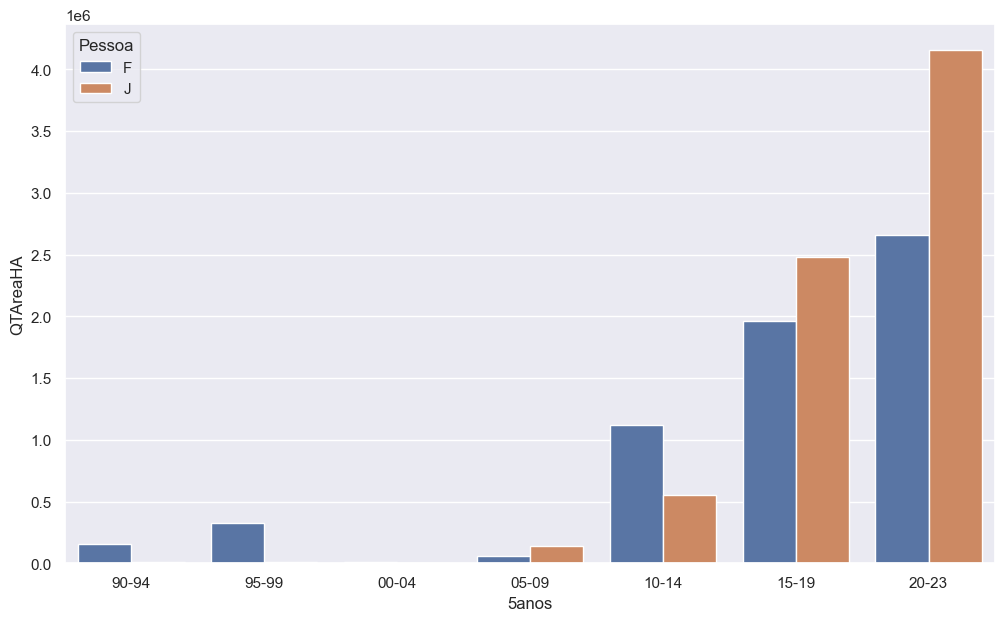

In [5]:
#Para 333
import seaborn as sns
sns.set(rc={"figure.figsize":(12, 7)})
join_333_regiao
pessoa_clean = pessoa[['DSProcesso','Pessoa','Pessoa_NOME']]
join_333_regiao_pessoa = join_333_regiao.merge(pessoa_clean,how='inner',on='DSProcesso')
join_333_regiao_pessoa.drop_duplicates('DSProcesso',keep='last',inplace=True)

meiaDecada_area_fisica = join_333_regiao_pessoa.query('Pessoa == "F"')[['QTAreaHA']].groupby(join_333_regiao_pessoa.Data.sub(1990)//5).sum().reset_index()
meiaDecada_area_jur = join_333_regiao_pessoa.query('Pessoa == "J"')[['QTAreaHA']].groupby(join_333_regiao_pessoa.Data.sub(1990)//5).sum().reset_index()


meiaDecada_pessoa_fisica = join_333_regiao_pessoa.query('Pessoa == "F"')[['Pessoa']].groupby(join_333_regiao_pessoa.Data.sub(1990)//5).value_counts().reset_index()
meiaDecada_pessoa_juridica = join_333_regiao_pessoa.query('Pessoa == "J"')[['Pessoa']].groupby(join_333_regiao_pessoa.Data.sub(1990)//5).value_counts().reset_index()



pessoa_fisica_contagem_area = meiaDecada_area_fisica.merge(meiaDecada_pessoa_fisica,how='inner',on = 'Data')
pessoa_fisica_contagem_area




pessoa_jur_contagem_area = meiaDecada_area_jur.merge(meiaDecada_pessoa_juridica,how='inner',on = 'Data')


frames = [pessoa_fisica_contagem_area, pessoa_jur_contagem_area]

result = pd.concat(frames)

result['5anos'] = np.select(
    [
        result['Data']==0, 
        result['Data']==1,
        result['Data']==2,
        result['Data']==3,
        result['Data']==4,
        result['Data']==5,
        result['Data']==6,
    ], 
    [
        '90-94', 
        '95-99',
        '00-04',
        '05-09',
        '10-14',
        '15-19',
        '20-23'
    ], 
    default='Unknown'
)


sns.barplot(data=result, x="5anos", y="QTAreaHA", hue="Pessoa")

In [14]:
#Para 513
import seaborn as sns
sns.set(rc={"figure.figsize":(12, 7)})
full_join
pessoa_clean = pessoa[['DSProcesso','Pessoa','Pessoa_NOME']]
join_513_regiao_pessoa = full_join.merge(pessoa_clean,how='inner',on='DSProcesso')
join_513_regiao_pessoa.drop_duplicates('DSProcesso',keep='last',inplace=True)

meiaDecada_area_fisica_513 = join_513_regiao_pessoa.query('Pessoa == "F"')[['QTAreaHA_x']].groupby(join_513_regiao_pessoa.Data_x.sub(1990)//5).sum().reset_index()
meiaDecada_area_jur_513 = join_513_regiao_pessoa.query('Pessoa == "J"')[['QTAreaHA_x']].groupby(join_513_regiao_pessoa.Data_x.sub(1990)//5).sum().reset_index()

meiaDecada_pessoa_fisica_513 = join_513_regiao_pessoa.query('Pessoa == "F"')[['Pessoa']].groupby(join_513_regiao_pessoa.Data_x.sub(1990)//5).value_counts().reset_index()
meiaDecada_pessoa_juridica_513 = join_513_regiao_pessoa.query('Pessoa == "J"')[['Pessoa']].groupby(join_513_regiao_pessoa.Data_x.sub(1990)//5).value_counts().reset_index()


pessoa_fisica_contagem_area = meiaDecada_area_fisica.merge(meiaDecada_pessoa_fisica,how='inner',on = 'Data')
pessoa_fisica_contagem_area.QTAreaHA.sum() #6285064.890000001

pessoa_jur_contagem_area = meiaDecada_area_jur.merge(meiaDecada_pessoa_juridica,how='inner',on = 'Data')
pessoa_jur_contagem_area.QTAreaHA.sum()# 7344659.77

7344659.77

In [90]:





pessoa_jur_contagem_area = meiaDecada_area_jur.merge(meiaDecada_pessoa_juridica,how='inner',on = 'Data')


frames = [pessoa_fisica_contagem_area, pessoa_jur_contagem_area]

result = pd.concat(frames)

result['5anos'] = np.select(
    [
        result['Data']==0, 
        result['Data']==1,
        result['Data']==2,
        result['Data']==3,
        result['Data']==4,
        result['Data']==5,
        result['Data']==6,
    ], 
    [
        '90-94', 
        '95-99',
        '00-04',
        '05-09',
        '10-14',
        '15-19',
        '20-23'
    ], 
    default='Unknown'
)


sns.barplot(data=result, x="5anos", y="QTAreaHA_x", hue="Pessoa")

,Unnamed: 0_x_x,DSProcesso,NRProcesso_x,NRAnoProcesso_x,BTAtivo_x,NRNUP_x,IDTipoRequerimento_x,IDFaseProcesso_x,IDUnidadeAdministrativaRegional_x,IDUnidadeProtocolizadora_x,...,Unnamed: 0_y_y,IDEvento_y,DTEvento_y,Evento__y,Data_y,Unnamed: 0_y,IDMunicipio_y,Municipios_y,UF_y,Regiao_y
0,129101,830.386/2022,830386,2022,S,48054.830386/2022-00,24.0,6,3,48054.0,...,4486939,333,2022-03-22,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2022,362711,3152105,PONTE NOVA,MG,Sudeste
1,141579,830.663/2013,830663,2013,S,48403.830663/2013-78,2.0,6,3,48403.0,...,4617316,333,2013-03-07,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2013,378739,3121605,DIAMANTINA,MG,Sudeste
2,155031,830.963/2020,830963,2020,S,48054.830963/2020-93,24.0,6,3,48054.0,...,4755904,333,2020-07-29,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2020,395983,3121001,DATAS,MG,Sudeste
3,160760,831.093/2015,831093,2015,S,48403.831093/2015-03,2.0,6,3,48403.0,...,4812449,333,2015-05-04,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2015,403226,3152303,PORTO FIRME,MG,Sudeste
4,168567,831.278/2015,831278,2015,S,48403.831278/2015-18,2.0,6,3,48403.0,...,4893130,333,2015-05-20,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,2015,413184,3121605,DIAMANTINA,MG,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,747564,650.683/1999,650683,1999,S,27205.650683/1999-14,2.0,6,5,27205.0,...,80718,333,1999-12-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1999,7362,1503606,ITAITUBA,PA,Norte
2259,747572,650.687/1999,650687,1999,S,27205.650687/1999-01,2.0,6,5,27205.0,...,80752,333,1999-12-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1999,7370,1503606,ITAITUBA,PA,Norte
2260,747582,650.692/1999,650692,1999,S,27205.650692/1999-13,2.0,6,5,27205.0,...,80794,333,1999-12-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1999,7380,1503606,ITAITUBA,PA,Norte
2261,747584,650.693/1999,650693,1999,S,27205.650693/1999-50,2.0,6,5,27205.0,...,80807,333,1999-12-01,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,1999,7382,1503606,ITAITUBA,PA,Norte


In [20]:
join_513_regiao_pessoa.query('Pessoa == "F"')[['QTAreaHA_x']].sum() #415089.17
join_513_regiao_pessoa.query('Pessoa == "J"')[['QTAreaHA_x']].sum() #565894.99

QTAreaHA_x    565894.99
dtype: float64